In [12]:
import skimage.io as io 
import matplotlib.pyplot as plt
import skimage as sk
import skimage.color as clr
import matplotlib as mat
import numpy as np
import scipy as sc
import glob
from skimage.filters import try_all_threshold

nombre d'images 8


<function list.clear()>

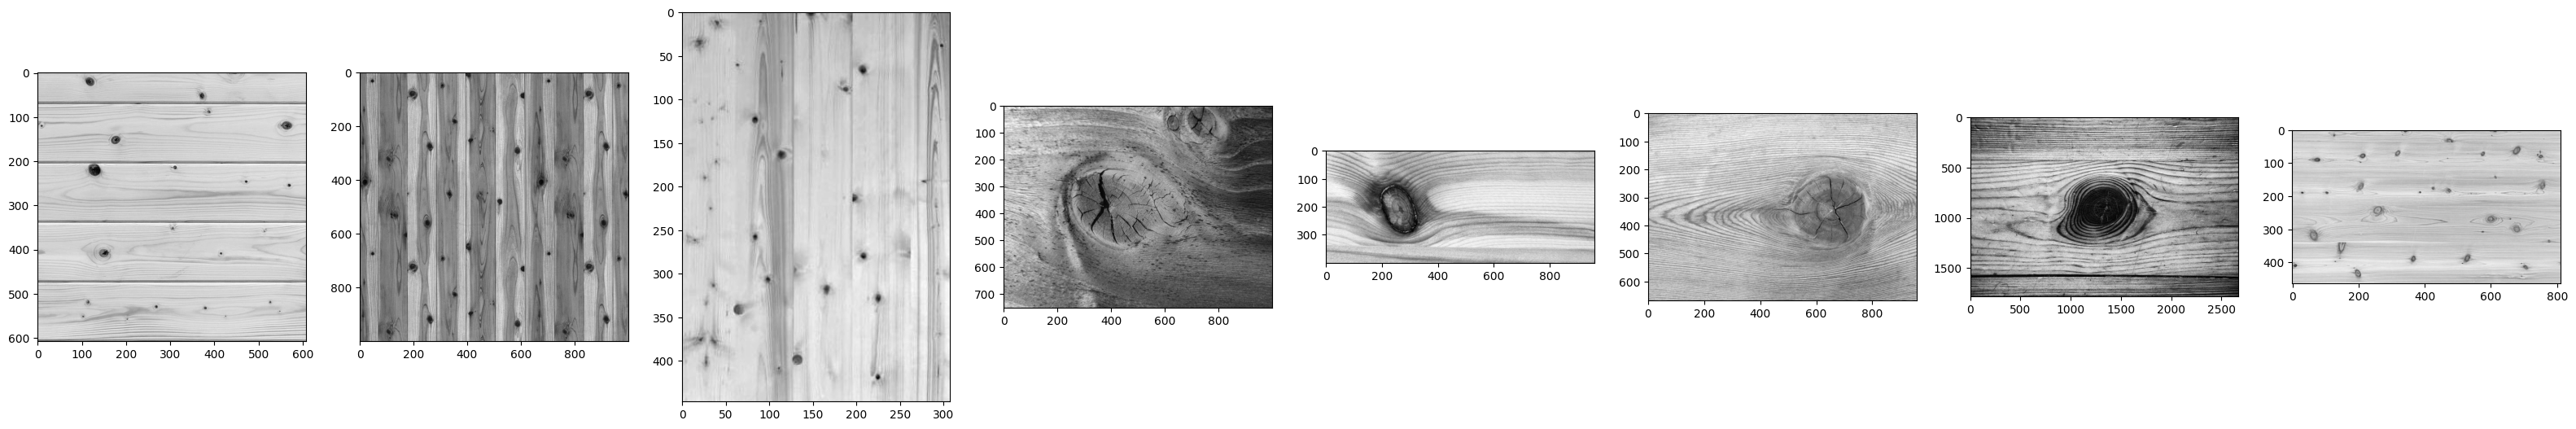

In [13]:
data = glob.glob('dataset/*.jpg')

data_size = len(data)
data_gray = [None] * data_size
data_threshold = [None] * data_size
data_fill = [None] * data_size

print("nombre d'images",data_size)

fig, ax = plt.subplots(1, data_size,figsize = (40,40))

for i in range(data_size):
    data_gray[i] = clr.rgb2gray(io.imread(data[i]))
    ax[i].imshow((data_gray[i]),cmap = 'gray')
data.clear

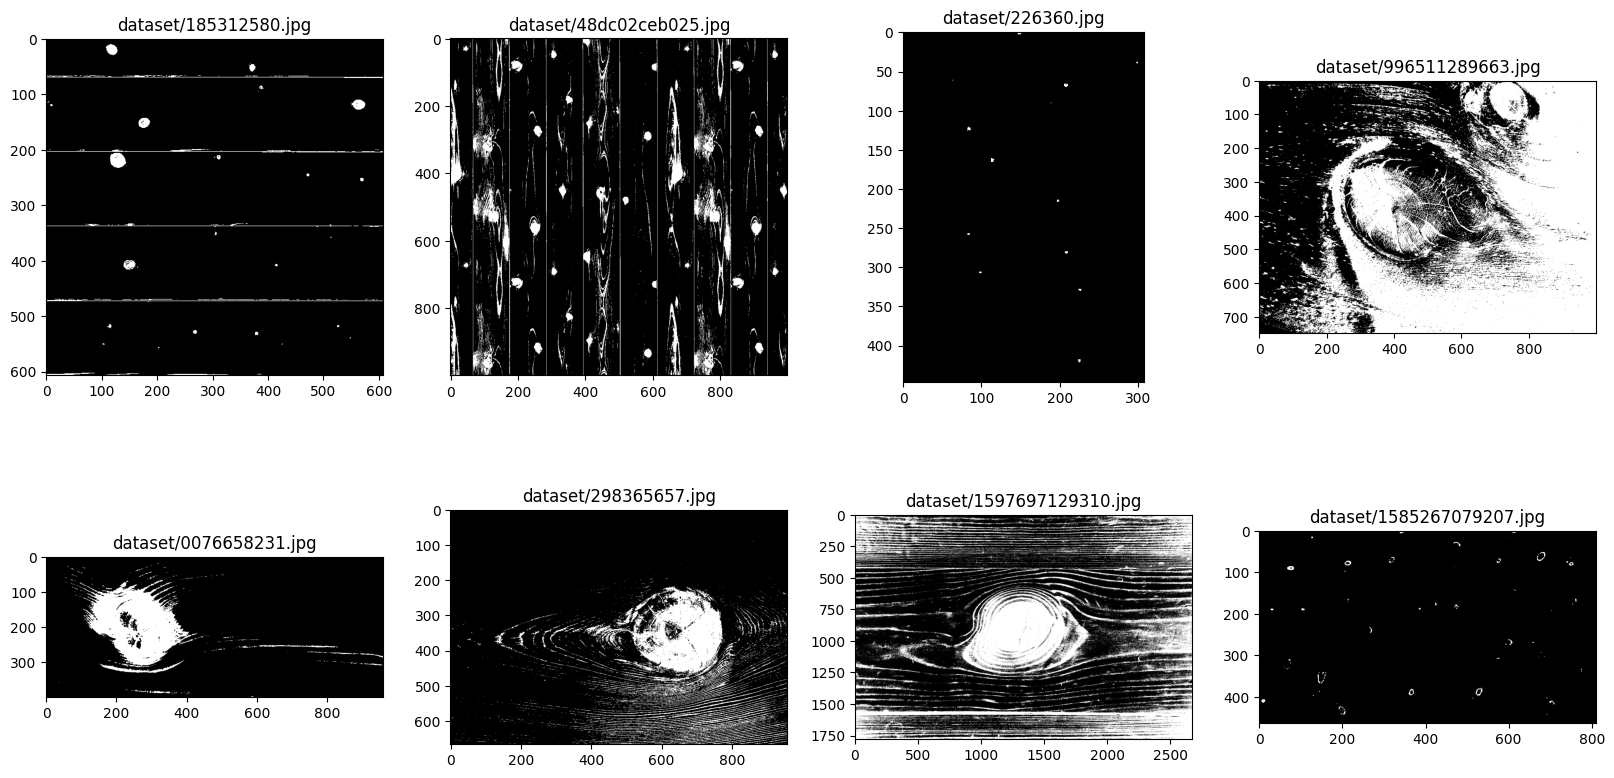

In [14]:
fig, ax = plt.subplots(2, 4,figsize = (20,10))

for i in range(data_size):
    data_mean= np.max(data_gray[i])/2
    data_threshold[i] = data_gray[i] < data_mean
    ax.flatten()[i].imshow((data_threshold[i]),cmap = 'gray')
    ax.flatten()[i].set_title((data[i]))
    


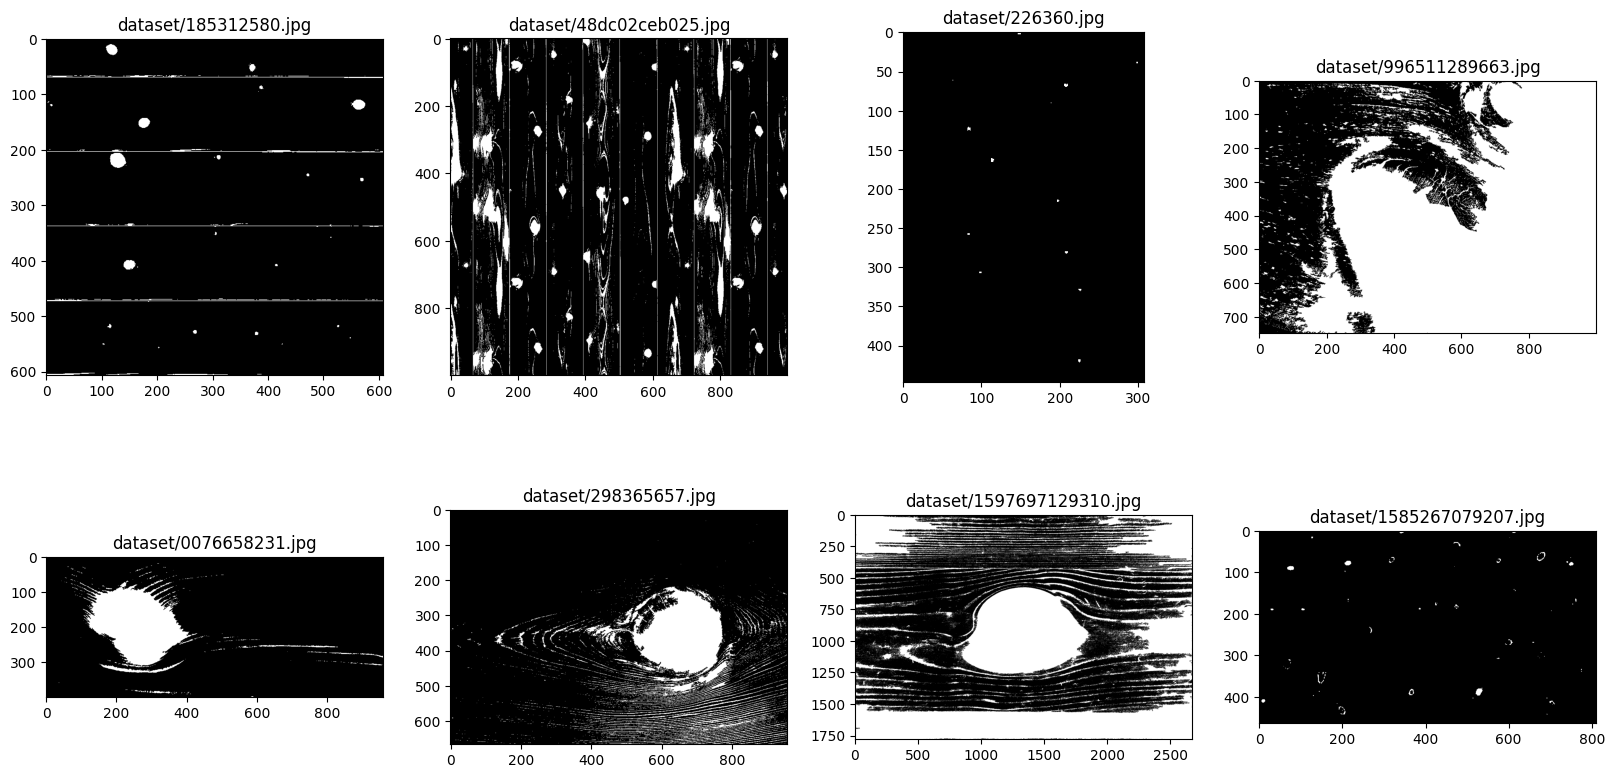

In [15]:
fig, ax = plt.subplots(2, 4,figsize = (20,10))

for i in range(data_size):
    data_fill[i] = sc.ndimage.binary_fill_holes(data_threshold[i])
    ax.flatten()[i].imshow((data_fill[i]),cmap = 'gray')
    ax.flatten()[i].set_title((data[i]))

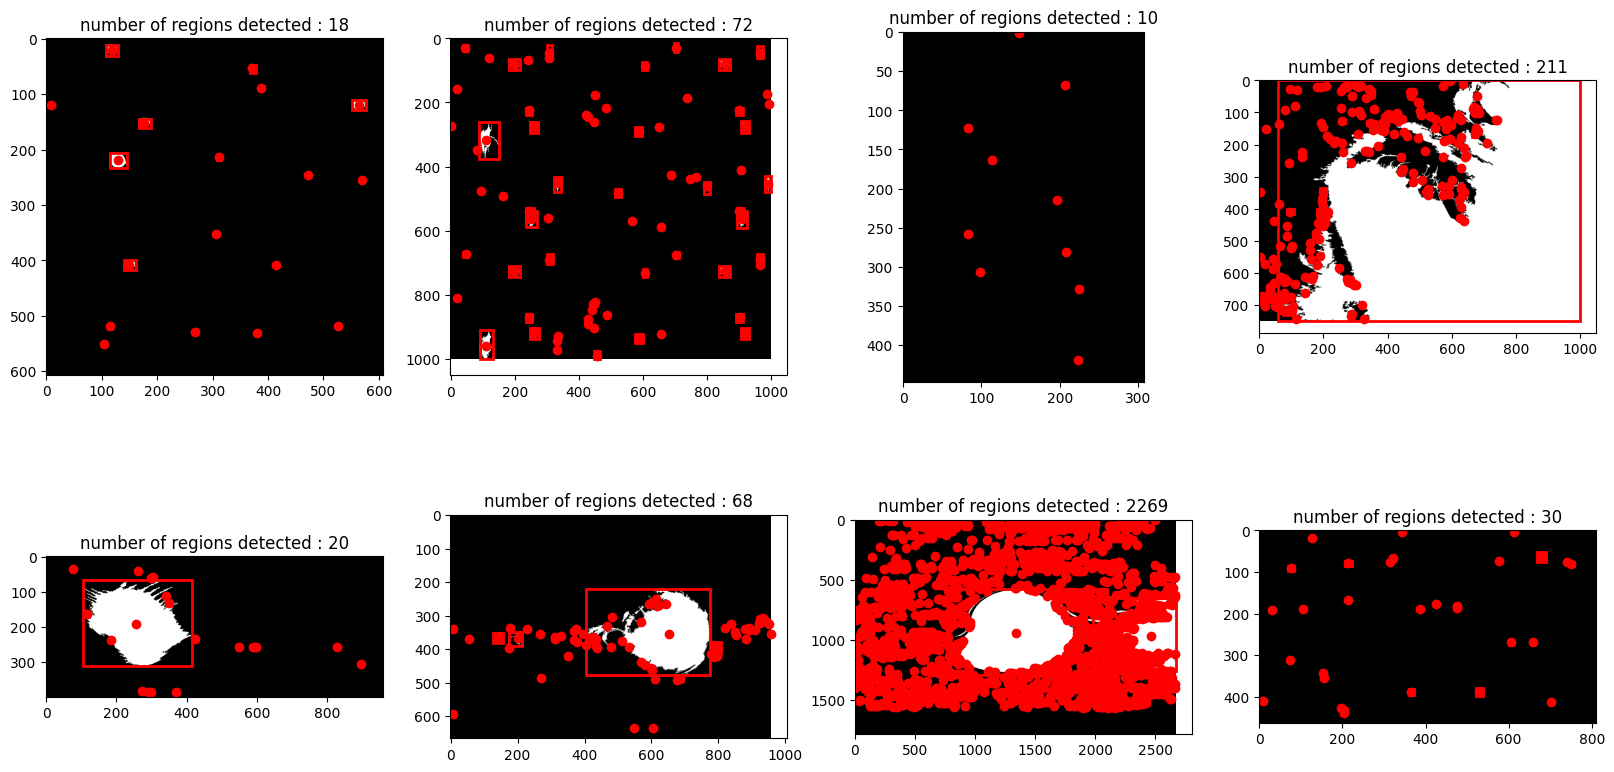

In [29]:
fig, ax = plt.subplots(2, 4,figsize = (20,10))

for i in range(data_size):
    labeled_regions, num_labels = sk.measure.label(data_fill[i], return_num=True)
    
    region_props = sk.measure.regionprops(labeled_regions)
    
    filtered_regions = [
        region.label
        for region in region_props
        if region.area > 5 and region.eccentricity < 0.9
    ]
    
    centroids = [region.centroid 
                 for region in region_props
                 if region.area > 5 and region.eccentricity < 0.9]
    bounding_boxes = [region.bbox 
                      for region in region_props
                      if region.area > 5 and region.eccentricity < 0.9]
    
    filtered_image = np.isin(labeled_regions, filtered_regions)

    
    ax.flatten()[i].imshow(filtered_image, cmap='gray')
    ax.flatten()[i].set_title(f"number of regions detected : {len(filtered_regions)}")
    for centroid, bbox in zip(centroids, bounding_boxes):
                y, x = centroid
                minr, minc, maxr, maxc = bbox
                rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
                ax.flatten()[i].add_patch(rect)
                ax.flatten()[i].plot(x, y, 'ro')


Une fois toute la méthode implémenter nous remarquons beaucoup d'erreurs.
On peux facielement voir d